In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


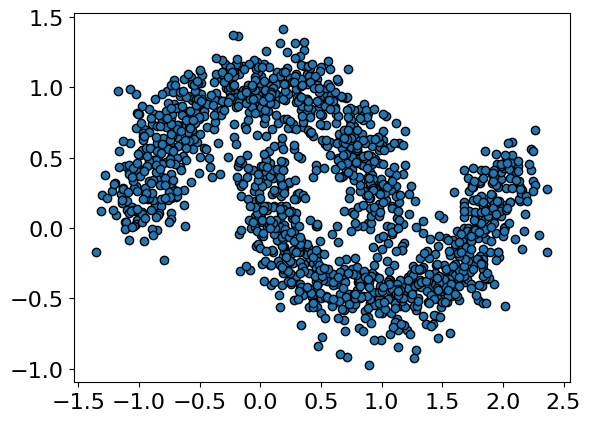

In [18]:
X, y = make_moons(n_samples=1500, noise=0.15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

plt.scatter(X[:, 0], X[:, 1],  edgecolors='k')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);

In [19]:
# 切分資料：70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

print("訓練集大小:", X_train.shape)
print("測試集大小:", X_test.shape)

訓練集大小: (1050, 2)
測試集大小: (450, 2)


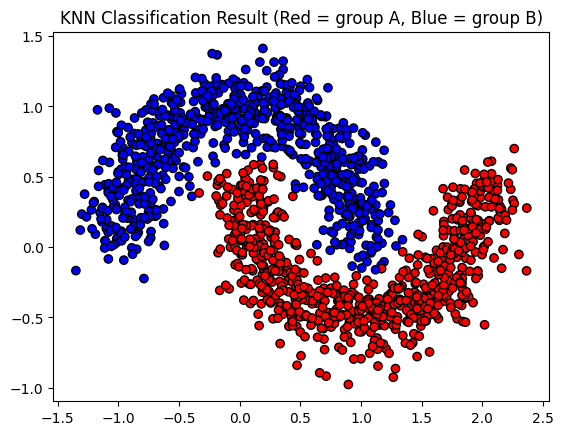

Accuracy: 0.9913333333333333


In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# 1. 建立 KNN 模型 (k=5)
knn_classifier = KNeighborsClassifier(n_neighbors=500)

# 2. 使用 GridSearchCV 調整超參數

param_grid = {
    'n_neighbors': [1, 10, 100, 500]
}

grid_search = GridSearchCV(knn_classifier, param_grid, cv=3, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)

# 3. 訓練模型
knn_classifier = grid_search.best_estimator_

y_pred = knn_classifier.predict(X)

# 畫分類結果
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=plt.cm.bwr, edgecolors='k')
plt.title("KNN Classification Result (Red = group A, Blue = group B)")
plt.show()

acc_knn = accuracy_score(y, y_pred)
print("Accuracy:", acc_knn)


Random Forest Test Accuracy: 0.9955555555555555


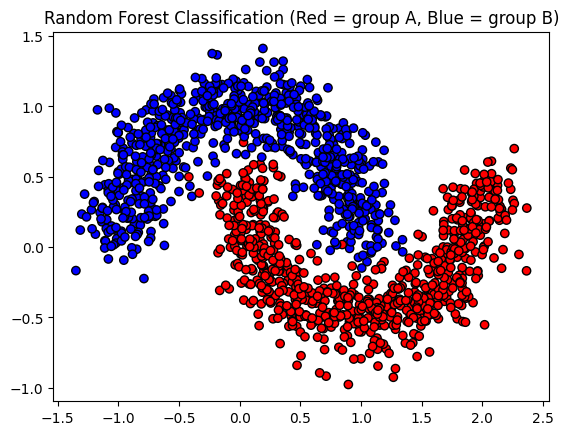

In [21]:
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier(n_estimators=100)

random_forest_classifier.fit(X_train, y_train)

### Test Acc Section
y_pred = random_forest_classifier.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred)
print("Random Forest Test Accuracy:", acc_rf)
###

y_pred_rf = random_forest_classifier.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred_rf, cmap=plt.cm.bwr, edgecolors='k')
plt.title("Random Forest Classification (Red = group A, Blue = group B)")
plt.show()


Epoch [100/200], Loss: 0.0236
Epoch [200/200], Loss: 0.0212
MLP Test Accuracy: 0.9888888597488403


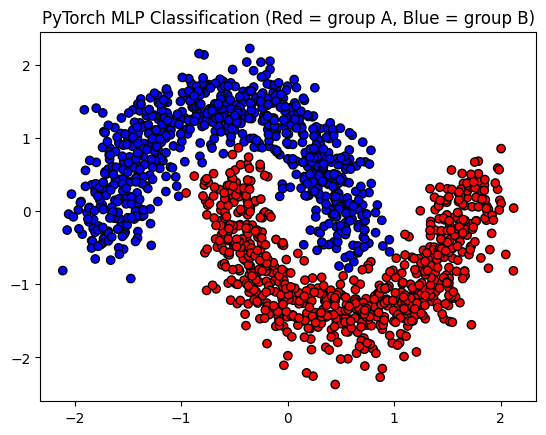

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)


class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(2, 64),   # 輸入2維 -> 20神經元
            nn.ReLU(),
            nn.Linear(64, 32),  # 隱藏層
            nn.ReLU(),
            nn.Linear(32, 2)    # 輸出2類
        )
    def forward(self, x):
        return self.layers(x)

mlp_model = MLP()

# loss 和 optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mlp_model.parameters(), lr=0.01)

epochs = 200
losses = []
for epoch in range(epochs):
    outputs = mlp_model(X_train)
    loss = criterion(outputs, y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())
    
    if (epoch+1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# Accuracy
with torch.no_grad():
    y_pred = mlp_model(X_test).argmax(dim=1)
    acc = (y_pred == y_test).float().mean()
    print("MLP Test Accuracy:", acc.item())

# Final Result
with torch.no_grad():
    y_all_pred = mlp_model(torch.tensor(X, dtype=torch.float32)).argmax(dim=1)

plt.scatter(X[:, 0], X[:, 1], c=y_all_pred, cmap=plt.cm.bwr, edgecolors='k')
plt.title("PyTorch MLP Classification (Red = group A, Blue = group B)")
plt.show()



### We can also try using a linear classifier on this dataset and see why KNN and other non-linear model shines.

In [23]:
from sklearn.svm import LinearSVC, SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clfLinearClassifier = LinearSVC()
clfLinearClassifier.fit(X_train, y_train)

clfSVC = SVC(kernel='rbf', gamma='scale')
clfSVC.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


Linear SVC Test Accuracy: 0.9022222222222223


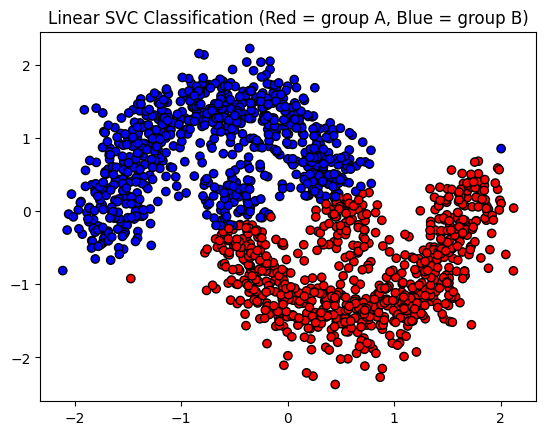

In [24]:
### Test Acc Section
y_pred_svc_linear = clfLinearClassifier.predict(X_test)
acc = accuracy_score(y_test, y_pred_svc_linear)
print("Linear SVC Test Accuracy:", acc)
###

y_pred_svc_linear = clfLinearClassifier.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred_svc_linear, cmap=plt.cm.bwr, edgecolors='k')
plt.title("Linear SVC Classification (Red = group A, Blue = group B)")
plt.show()

Nonlinear SVC Test Accuracy: 0.9933333333333333


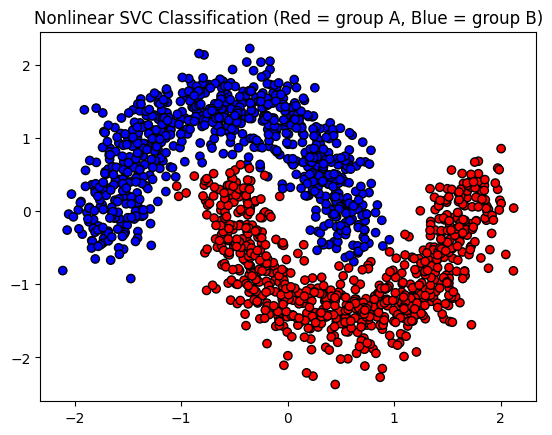

In [25]:
### Test Acc Section
y_pred_svc_nonlinear = clfSVC.predict(X_test)
acc = accuracy_score(y_test, y_pred_svc_nonlinear)
print("Nonlinear SVC Test Accuracy:", acc)
###

y_pred_svc_nonlinear = clfSVC.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred_svc_nonlinear, cmap=plt.cm.bwr, edgecolors='k')
plt.title("Nonlinear SVC Classification (Red = group A, Blue = group B)")
plt.show()